In [1]:
import numpy as np
from matplotlib.pyplot import *

Text(0.5, 1.0, 'sigmoid')

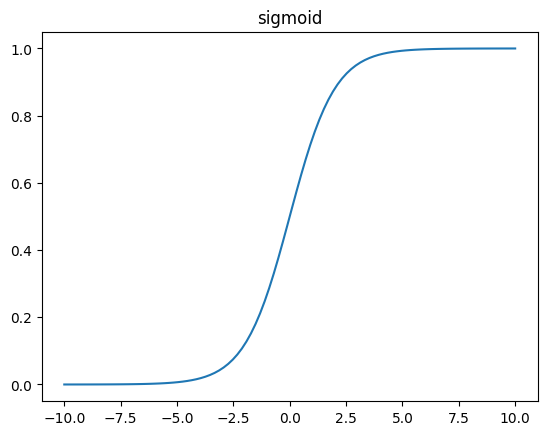

In [2]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plot(x,y); title('sigmoid')

Text(0.5, 1.0, 'Hyperbolic tangent')

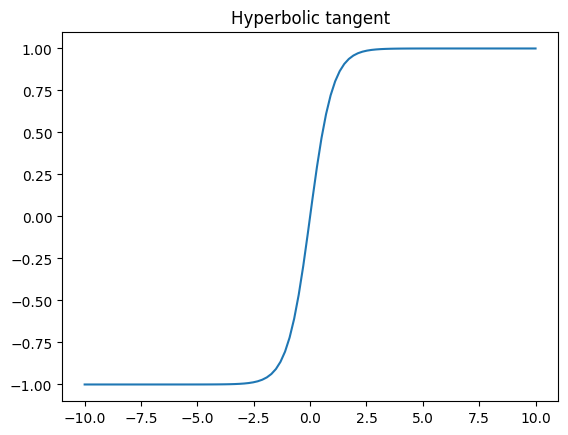

In [3]:
y = np.tanh(x)
plot(x,y); title('Hyperbolic tangent')

Text(0.5, 1.0, 'Rectified linear unit')

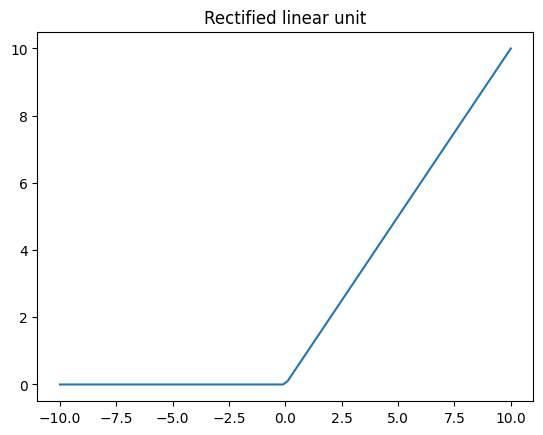

In [4]:
y = np.maximum(0,x)
plot(x,y); title('Rectified linear unit')

Text(0.5, 1.0, 'Softplus')

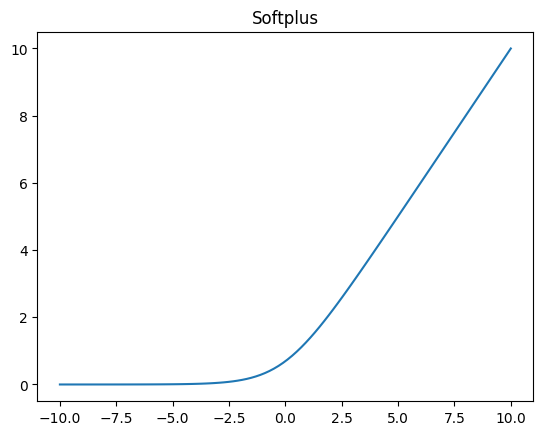

In [5]:
y = np.log(1+np.exp(x))
plot(x,y); title('Softplus')

Text(0.5, 1.0, 'Parameterized ReLU')

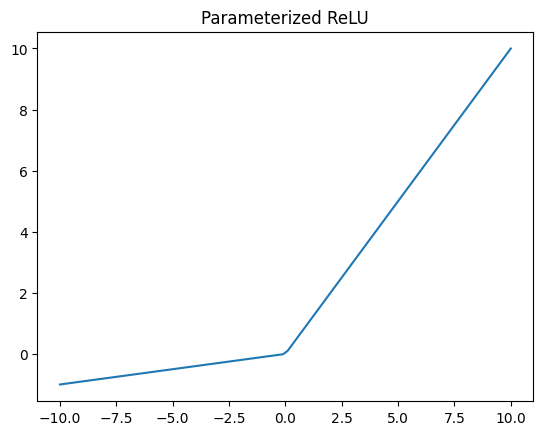

In [6]:
y = np.zeros(len(x))
for i in range(len(x)):
    if x[i] < 0:
        y[i] = 0.1*x[i]
    else:
        y[i] = x[i]
plot(x,y); title('Parameterized ReLU')

In [7]:
np.zeros((5,2)).shape

(5, 2)

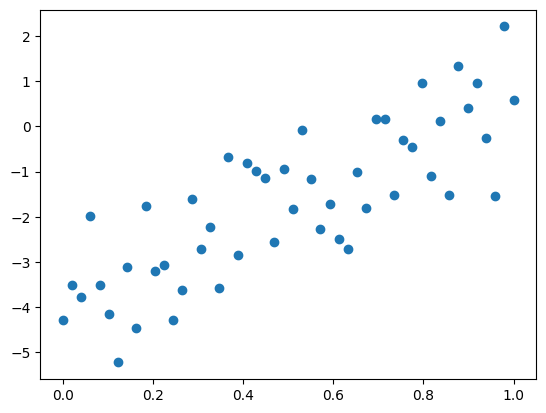

In [8]:
import numpy as np
from matplotlib import pyplot as plt
n = 50
x = np.linspace(0, 1, n)
w = 5; b = -4 # true parameters
y = w*x + b + np.random.randn(n)
plt.plot(x,y,'o')
plt.show()

[[16.83673469 25.        ]
 [25.         50.        ]] [-22.46594275 -84.90193102] [ 4.60831113 -4.00219419]


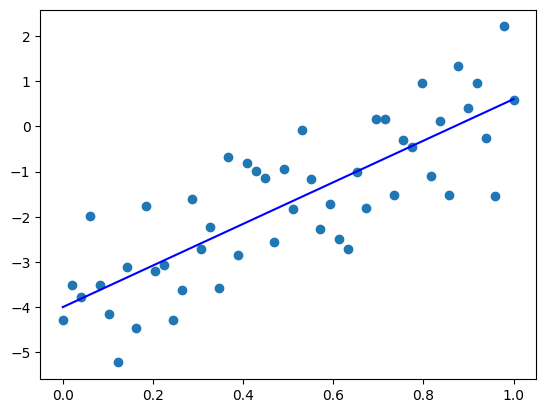

In [9]:
A11 = np.sum(x*x)
A12 = np.sum(x)
A = np.array([[A11,A12],[A12,n]])
b = np.array([np.sum(x*y), np.sum(y)])
m = np.linalg.inv(A).dot(b)
print(A,b,m)
y1 = m[0]*x+m[1]
plt.plot(x,y,'o',x,y1,'b-')
plt.show()

In [10]:
# m = [w,b]
def grad(m,x,y):
    e = m[0]*x+m[1]-y
    return np.array([np.sum(e*x), np.sum(e)])

In [11]:
# g = [gw,gb]
def step(m,x,y,g):
    e = m[0]*x+m[1]-y
    gg = g[0]*x+g[1]
    return np.sum(e*gg)/np.sum(gg*gg)

In [12]:
# loss function
def loss(m,x,y):
    e = m[0]*x+m[1]-y
    return 0.5*np.sum(e*e)

In [13]:
m0 = np.random.randn(2)
print(loss(m0,x,y))
for i in range(10):
    g = grad(m0,x,y)
    s = step(m0,x,y,g)
    #s = 0.001
    m = m0 - s*g
    print(loss(m,x,y))
    m0 = m

103.8577971518378
56.757048917348
37.499278398393585
29.625481500000678
26.40617438778217
25.08991764195528
24.551748476808168
24.33171081984391
24.24174548251529
24.20496195176734
24.189922513529666


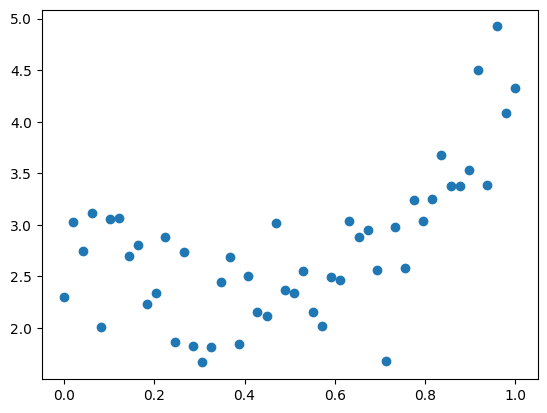

In [14]:
# Polynomial regression
import numpy as np
from matplotlib import pyplot as plt
n = 50
x = np.linspace(0, 1, n)
a = 5; b = -4; c = 3
y = a*x*x + b*x + c + 0.5*np.random.randn(n)
plt.plot(x,y,'o')
plt.show()